# Introduction to Linear Regression

Linear Regression assumes that the relationship between 2 variables, x and y can be modeled by a straight line

$y = \beta_0 + \beta_1x$

We can also see the equation written as : ** y = mx +b**

with $\beta_0$ and $\beta_1$ represents 2 model parameters 

$x$ is usually called the **predictor** and $y$  the **response**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('../Dataset/Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Using the famous Iris dataset to showcase an example of a linear regression plot. This plot shows the relationship between flower petal length and their petal width. (Where the hell am I going to find "Common Brushtail Possum" data)

Linear regression with seaborn : **regplot()** or **lmplot()**
<br/><br/>
**regplot() : ** simple model fit
<br/><br/>
**lmplot()  : ** model fit + FacetGrid

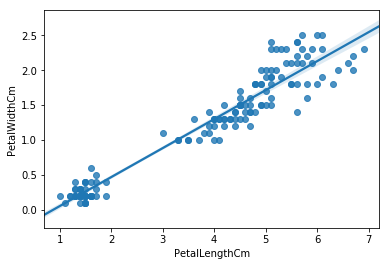

In [4]:
sns.regplot(x="PetalLengthCm",y="PetalWidthCm",data=df)

We can witness that the data align following a straight line 

## 7.1 Line fitting, residuals and correlation

**Linear relationship** is being able to represent the relationship between 2 set of variables with a line

### 7.1.1 Beginning with straight lines

In [5]:
petal = df.sample(1,random_state=123)
petal

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
73,6.3,2.5,4.9,1.5,Iris-versicolor


Straight line should only be used when the dta appear to have a linear relationship

### 7.1.2 Fitting a line by eye

Linear regression function

In [6]:
def linear_regression(x,y):
    #Small control to test the nature of the parameters (Should be dataFrame columns)
    if type(x) and type(y) is pd.Series:
        print('Series')

        df = pd.DataFrame()
        df['X'] = x
        df['Y'] = y
        df['XY'] = df['X']*df['Y']
        df['X_squared'] = df['X']*df['X']
        df['Y_squared'] = df['Y']*df['Y']
        #Let's make this more readable by putting each of the Numerator and Denominator
        A = (df['Y'].sum() * df['X_squared'].sum()) - (df['X'].sum() * df['XY'].sum())
        B = df.shape[0]*df['X_squared'].sum() -(df['X'].sum())**2
        #We calculate the Y-intercept
        y_intercept =  A/B

        #We know calculate the slope
        C = df.shape[0]*df['XY'].sum() - df['X'].sum()*df['Y'].sum()
        D = df.shape[0]*df['X_squared'].sum() - (df['X'].sum())**2

        #separating the Numerator and Denominator makes it more readable
        slope = C/D

        #Gives the whole table
        #print(df)

        return (slope,y_intercept)


    else:
        print('Type should should be Series (a dataframe column)')

In [7]:
d = pd.DataFrame({'A':[1,2,3,4,5,6],'B':[6,5,4,3,2,1]})

In [8]:
linear_regression(d['A'],d['B'])

Series


(-1.0, 7.0)

* We compute the **slope** and **Y-intercept** 

In [9]:
sl,yi = linear_regression(df["PetalLengthCm"],df["PetalWidthCm"])

Series


In [15]:
sl

0.41599999999999998

In [11]:
yi

-0.36651404521672631

So we can conclude that the equation for the line of the petal length and width relationship is approximatively (the "hat" signifies that we are talking about an estimate) : 

<h3>$\hat{y} = 0.415x - 0.366$ </h3>

### 7.1.2 Residuals

The data don't usually all fit exactly accross the line, they are mostly scattered around. We call **residual** the vertical distance between a data point and the regression line.
<br/>
They are positive if they fall above the regression line, and negative if they fall below.
<br/>
If they fit the line, the residual is zero.

We can write them as : 
<br/><br/>

&ensp;&ensp;&ensp; $Residual = Data - Fit$


Or mathematically :
<br/><br/>
&ensp;&ensp;&ensp; $e = y - \hat{y}$

A right linear model would be for these residuals to be as small as possible

* **<u>Residual plot</u>**

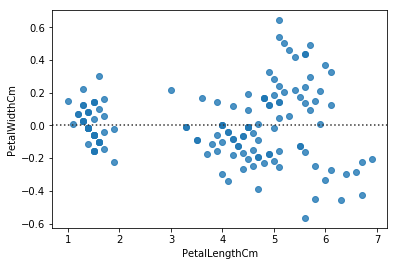

In [17]:
sns.residplot(x="PetalLengthCm",y="PetalWidthCm",data=df)

Here we plot the residuals, as the middle straight line represents the regression line; the data on the line fit perfectly the model, the one above it are the positive residuals and vice versa. We call this a **residual plot**, and is very useful to evaluate how well a linear model fits a dataset.

### 7.1.3 Describing linear relationships with correlation

**Correlation** describes the strength of the linear relationship between 2 variable. It measures how things are related.
<br/>
The correlation **R** is always comprised between -1 and 1 

*  **0**  : No apparent linear relationship
*  **1**  : perfectly linear and positive relationship (going upward)
* **-1**  : Perfectly linear and negative relationship (going downward)

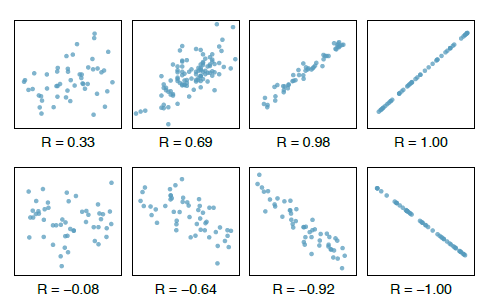

In [18]:
from IPython.display import Image
Image(filename="../img/correlation.png")

## 7.2 Least square regression line

When we find a linear fit for our data, we call this line the **regression line**. And it's equation is $\hat{y}= mx + b$.

The **Least squares regression line** is a more rigorous approach in which we try to minimize the vertical distance from the data points to the regression line, or in other words minimize the some of the **residuals**.

we can add some other definitions, as the slope equation :
<br/>
<h2>$m = \frac{S_y}{S_x}R$</h2>